# Get Audio Fetures of Eurovision Songs

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import csv
import json
import pandas as pd
import numpy as np
from pprint import pprint
import os.path
import matplotlib.pyplot as plt
%matplotlib nbagg
#inline
plt.style.use('seaborn-deep')

In [3]:
# Create spotify wrapper object

from spotify_wrapper import SpotifyWrapper
sp = SpotifyWrapper(client_id = '9b23e599c83f45d9a93e6559d79b3f4a', 
                    client_secret = '710a69f7a7984a6c9c71c1682c46d7b5')

## Get songs spotify IDs

In [53]:
# read csv with all songs in finals 
songs = []
with open('finalist_songs_with_ids.csv') as csv_file:
    songs = [{k: v for k, v in row.items()} for row in csv.DictReader(csv_file, skipinitialspace=True)]

In [20]:
# count songs with id
count_songs_with_id = sum([ (1 if s['id']!='' else 0) for s in songs])
print('Count of songs with id:',count_songs_with_id)

# get spotify song ids
for i,s in enumerate(songs[1000:]):
        
    # only search those songs without id
    if s['id']=='':
        
        # search song info
        song_info = sp.search_song(s['Artist'], s['Song'])
        
        # process received info
        if song_info == None:
            print('{} NOT FOUND: {} - {}'.format(i, s['Artist'], s['Song']))

        else:
            
            # sanity checks
            check_artist = 1 if sp.remove_accents(s['Artist'].lower()) == sp.remove_accents(song_info['artists'][0]['name'].lower()) else 0
            check_title = 1 if sp.remove_accents(s['Song'].lower()) == sp.remove_accents(song_info['name'].lower()) else 0
            
            print('{} FOUND {} {}: {} - {} | {} - {}'.format(i, check_artist, check_title, 
                                                            s['Artist'], s['Song'], 
                                                            song_info['artists'][0]['name'], song_info['name']))

            # store id in original object dictionary
            s['id'] = song_info['id']

            # store song with id in csv file
            keys = s.keys()
            with open('finalist_songs_with_ids.csv', 'w') as output_file:
                w = csv.DictWriter(output_file, keys)
                w.writeheader()
                w.writerows(songs)

Count of songs with id: 339
0 FOUND 1 1: Olta Boka - Zemrën e lamë peng | Olta Boka - Zemrën E Lamë Peng
1 NOT FOUND: No Angels - Disappear
2 NOT FOUND: Sirusho - Qélé, Qélé (Քելե Քելե)
3 NOT FOUND: Laka - Pokušaj
4 NOT FOUND: Boaz Ma'uda - The Fire in Your Eyes
5 FOUND 1 1: Teräsbetoni - Missä miehet ratsastaa | Teräsbetoni - Missä miehet ratsastaa
6 NOT FOUND: Kraljevi Ulice and 75 cents - Romanca
7 FOUND 1 0: Isis Gee - For Life | Isis Gee - FOR LIFE - Radio Edit
8 FOUND 1 0: Euroband - This Is My Life | Euroband - This Is My Life (Iceland Eurovision 2008) Orginal
9 FOUND 1 1: Mor ve Ötesi - Deli | mor ve ötesi - Deli
10 FOUND 1 1: Vânia Fernandes - Senhora do mar (Negras águas) | Vânia Fernandes - Senhora Do Mar (Negras Águas)
11 NOT FOUND: Pirates of the Sea - Wolves of the Sea
12 FOUND 1 1: Charlotte Perrelli - Hero | Charlotte Perrelli - Hero
13 NOT FOUND: Simon Mathew - All Night Long
14 NOT FOUND: Diana Gurtskaya - Peace Will Come
15 NOT FOUND: Ani Lorak - Shady Lady
16 FOUND 

134 FOUND 1 0: Cascada - Glorious | Cascada - Glorious - Video Edit
135 NOT FOUND: Dorians - Lonely Planet
136 FOUND 1 1: Anouk - Birds | Anouk - Birds
137 NOT FOUND: Cezar - It's My Life
138 NOT FOUND: Bonnie Tyler - Believe in Me
139 FOUND 1 0: Robin Stjernberg - You | Robin Stjernberg - Locked Into You
140 FOUND 1 0: ByeAlex - Kedvesem (Zoohacker Remix) | ByeAlex - Kedvesem - Zoohacker Remix
141 NOT FOUND: Emmelie de Forest - Only Teardrops
142 FOUND 1 0: Eythor Ingi - Ég á líf | Eythor Ingi - Eg a Lif (Icelandic Esc Entry 2013)
143 FOUND 1 0: Farid Mammadov - Hold Me | Farid Mammadov - Hold me - Full Version
144 NOT FOUND: Koza Mostra feat. Agathon Iakovidis - Alcohol Is Free
145 FOUND 1 0: Zlata Ognevich - Gravity | Zlata Ognevich - Gravity Remix - Radio Edit
146 FOUND 1 1: Marco Mengoni - L'essenziale | Marco Mengoni - L'essenziale
147 FOUND 1 1: Margaret Berger - I Feed You My Love | Margaret Berger - I Feed You My Love
148 NOT FOUND: Nodi Tatishvili and Sophie Gelovani - Waterf

252 FOUND 1 0: Robin Bengtsson - I Can't Go On | Robin Bengtsson - I Can´t Go On
253 FOUND 1 1: Kristian Kostov - Beautiful Mess | Kristian Kostov - Beautiful Mess
254 FOUND 1 1: Alma - Requiem | Alma - Requiem


In [18]:
# Explore particular song
track = ''
artist = 'Imaani'
q = ('track:'+track if track != '' else '') + (' artist:'+artist if artist != '' else '')
print('q='+q)
for t in (sp.sp.search(q=q, type='track'))['tracks']['items']:
    print(t['artists'][0]['name'] + ' - ' + t['name'])

q= artist:Imaani
Incognito - Love Born In Flames (feat. Imaani & Stuart Zender)
Imaani - Found My Light - The Layabouts Vocal Mix
The Layabouts - Shine - The Layabouts Vocal Mix
The Layabouts - Stay - The Layabouts Vocal Mix
Copyright - Wizeman (feat. Imaani) - Peaktime Vocal
The Layabouts - Shine - The Layabouts Vocal Mix
Reel People - Amazing featuring Tony Momrelle & Imaani
Imaani - Live Without Love - 123.5BPM
Imaani - Found My Light - 122BPM
Imaani - Found My Light - Acoustic Mix


## Explore available songs

In [60]:
# create dataframe
songs_df = pd.DataFrame(songs)

In [63]:
# number of songs with id
songs_df[songs_df['id'] != '']['Artist'].count()

491

In [68]:
# points stats of songs with id
songs_df[(songs_df['id'] != '') & (songs_df['Points'] != '')]['Points'].astype('int64').describe()

count    483.000000
mean      77.434783
std       88.237569
min        0.000000
25%       18.000000
50%       52.000000
75%      111.000000
max      758.000000
Name: Points, dtype: float64

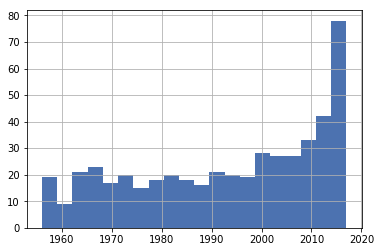

In [89]:
# years of songs with id
songs_df[songs_df['id'] != '']['Year'].astype('int64').hist(bins=20)

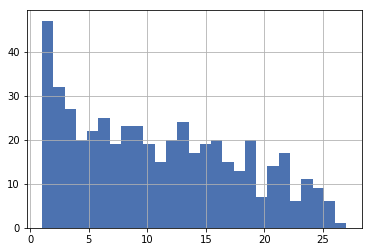

In [86]:
# ranks of songs with id
songs_df[songs_df['id'] != '']['Rank'].astype('int64').hist(bins=27)

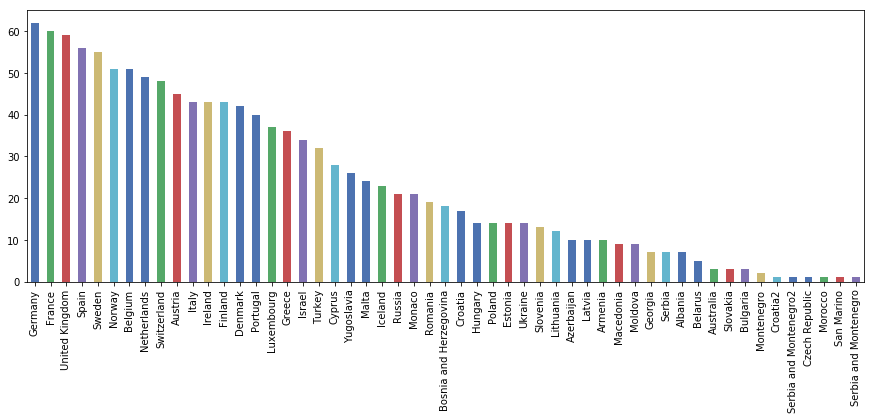

In [85]:
# countries of songs with id
songs_df['Country'].value_counts().plot(kind='bar', figsize=(15,5))